In [4]:
# --- Import Library ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Cek versi TensorFlow (Opsional, biar keren aja)
print(f"Versi TensorFlow yang digunakan: {tf.__version__}")

e:\coding_yuwono\UAS ML\.venv\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


Versi TensorFlow yang digunakan: 2.20.0


In [5]:
# --- 1. Persiapan Data ---

# Load Dataset (Pastikan file csv sudah di-upload)
df_train = pd.read_csv('train.csv')

# Pisahkan Fitur dan Target
X = df_train.drop(['critical_temp'], axis=1)
y = df_train['critical_temp']

# Split Data (80% Latih, 20% Ujian)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- STANDARD SCALING (Wajib untuk Neural Network) ---
# Deep Learning susah belajar kalau angkanya jomplang (misal ada 0.01 tapi ada juga 1000)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Data siap! Jumlah fitur: {X_train.shape[1]}")
print("Data telah dinormalisasi (Scaled).")

Data siap! Jumlah fitur: 81
Data telah dinormalisasi (Scaled).


In [6]:
# --- 2. Membangun Arsitektur Neural Network ---
# Menjawab Rumusan Masalah No. 2 (Kompleksitas Arsitektur)

model = Sequential([
    # Input Layer & Hidden Layer 1 (128 Neuron)
    # Activation 'relu' adalah standar industri agar model belajarnya cepat
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),

    # Hidden Layer 2 (64 Neuron)
    Dense(64, activation='relu'),

    # Hidden Layer 3 (32 Neuron)
    Dense(32, activation='relu'),

    # Dropout Layer (Mencegah Overfitting - Menjawab RM No. 3)
    # Mematikan 20% neuron secara acak saat latihan
    Dropout(0.2),

    # Output Layer (1 Neuron karena regresi prediksi angka)
    Dense(1, activation='linear')
])

# Kompilasi Model
model.compile(optimizer='adam', loss='mean_squared_error')

# Tampilkan ringkasan bentuk otak buatannya
model.summary()

e:\coding_yuwono\UAS ML\.venv\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        10,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,865 (81.50 KB)

 Trainable params: 20,865 (81.50 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# --- 3. Proses Training (Learning) ---

# EarlyStopping: Rem otomatis jika model sudah tidak bertambah pintar
# (Mencegah buang-buang waktu dan overfitting)
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,             # Tunggu 10 epoch, kalau gak ada kemajuan, stop.
    restore_best_weights=True
)

print("Mulai Training...")
history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=100,              # Maksimal 100 putaran
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)
print("Training Selesai!")

Mulai Training...
Epoch 1/100
532/532 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 488.9118 - val_loss: 238.7355
Epoch 2/100
532/532 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 272.9005 - val_loss: 240.9300
Epoch 3/100
532/532 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 251.4279 - val_loss: 204.2533
Epoch 4/100
532/532 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 240.6438 - val_loss: 188.5919
Epoch 5/100
532/532 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 229.5178 - val_loss: 187.7914
Epoch 6/100
532/532 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 226.7849 - val_loss: 178.8776
Epoch 7/100
532/532 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 216.2008 - val_loss: 170.3269
Epoch 8/100
532/532 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 216.2640 - val_loss: 170.2748
Epoch 9/100
532/532 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 210.6036 - val_loss: 169.0356
Epoch 10/100
532/532 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 202.1358 - val_loss: 166.7124
Epoch 11/100
532/532 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 202.3053 

133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step
HASIL AKHIR (TEST SET):
R2 Score : 0.9084
RMSE     : 10.2698


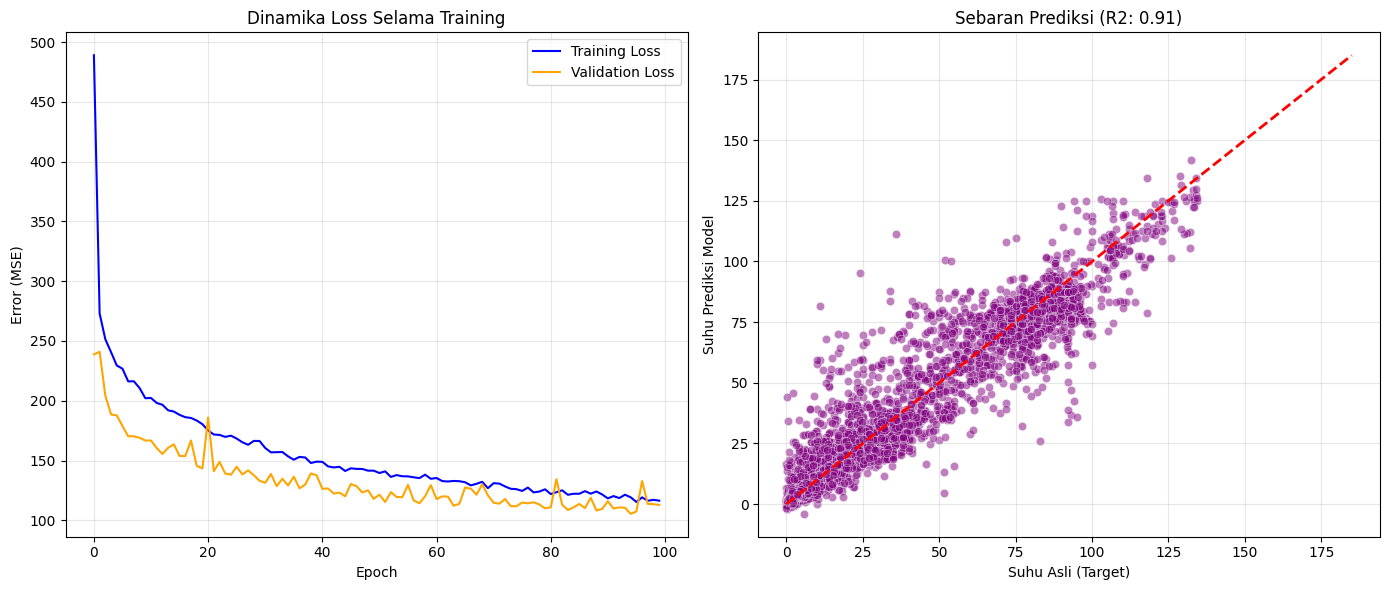

In [8]:
# --- 4. Evaluasi & Visualisasi ---

# Prediksi data test
y_pred = model.predict(X_test_scaled).flatten()

# Hitung Metrik Akurasi (Menjawab RM No. 1)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("="*30)
print(f"HASIL AKHIR (TEST SET):")
print(f"R2 Score : {r2:.4f}")
print(f"RMSE     : {rmse:.4f}")
print("="*30)

# --- PLOT GRAFIK ---
plt.figure(figsize=(14, 6))

# Grafik 1: Loss Curve (Cek Overfitting)
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Dinamika Loss Selama Training')
plt.xlabel('Epoch')
plt.ylabel('Error (MSE)')
plt.legend()
plt.grid(True, alpha=0.3)

# Grafik 2: Prediksi vs Asli
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, color='purple')
# Garis diagonal (Perfect Prediction)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.title(f'Sebaran Prediksi (R2: {r2:.2f})')
plt.xlabel('Suhu Asli (Target)')
plt.ylabel('Suhu Prediksi Model')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()